# High level statistics of data set

1. Total # of points are 1224
2. Total # of features are 3 
3. Number of classes are 2
4. Number of data-points per class are 3, 
Exaplanation of features in data set

1. age  - age of the patient in years.
2. year - year in which they undergone surgery.
3. positive axillary nodes  - A lymph node in the area of the armpit (axilla) to which cancer has spread.
4. status - Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year.

Reference:
1. https://www.cancer.gov/publications/dictionaries/cancer-terms/def/positive-axillary-lymph-node
2. https://www.kaggle.com/gilsousa/habermans-survival-data-set
3. AppliedAI EDA ipython notebook 

# Objective
Plot and analyze  Haberman's cancer data by Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots)  and  Bi-variate analysis (scatter plots, pair-plots) 

# 1 Univaraite analysis

## 1.1 Probability density function(PDF)

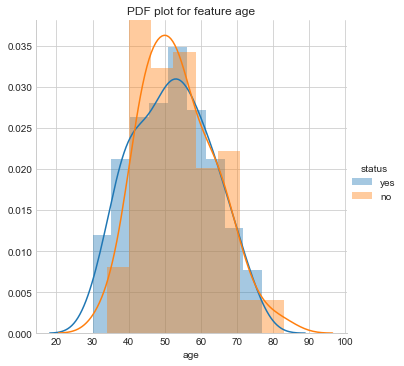

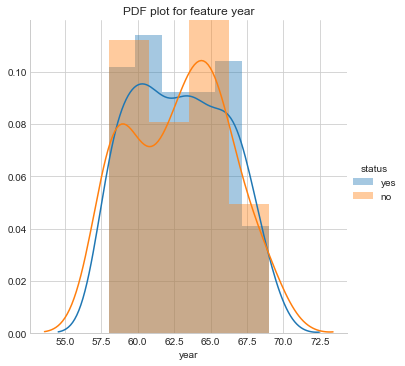

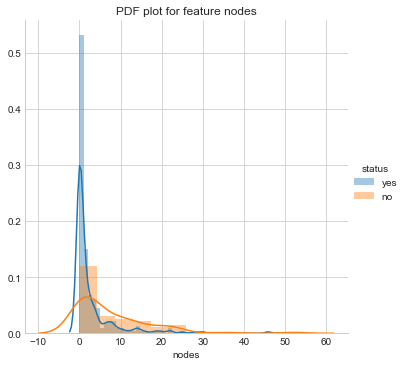

In [226]:
#PDF 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings 

sns.set_style('whitegrid')

warnings.filterwarnings("ignore")
#PDF plot by considering feature age
cancer_ds = pd.read_csv("haberman.csv")
#print(cancer_ds)

cancer_ds['status'] = cancer_ds['status'].map({1:"yes", 2:"no"})

sns.FacetGrid(cancer_ds,hue="status",size=5)\
   .map(sns.distplot,"age")\
   .add_legend();
plt.xlabel("age")
plt.title("PDF plot for feature age")
plt.show()

#PDF plot by considering feature year
sns.FacetGrid(cancer_ds,hue="status",size=5)\
   .map(sns.distplot,"year")\
   .add_legend();
plt.xlabel("year")
plt.title("PDF plot for feature year")

plt.show()

#PDF plot by considering feature nodes
sns.FacetGrid(cancer_ds,hue="status",size=5)\
   .map(sns.distplot,"nodes")\
   .add_legend();
plt.xlabel("nodes")
plt.title("PDF plot for feature nodes")

plt.show()


### Observation: 
There is much overlapping for figure 1 and figure 2. So we cannot analyze because the more the sepration the better we can analyize the plot.
From Figure 3 we can understand that, if nodes<=0 then patient survived 5 years or longer.
Also if we observe, the distribution of points for status Yes is high till ~4 and less chance after ~4.

if node <=0 then
"Can be survived"
Elseif node>=0 &&node<=~4 then
"Chances are high for suvival"
else
"Cannot survive or short survival"
End If


## 1.2 Cummulative density function(CDF) 
It will help us to determine percentage of patients survived. 
It's good to consider feature "nodes" to plot CDF as we able to find some result for PDF. Below are the plots for Status "Yes" and "No" 

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


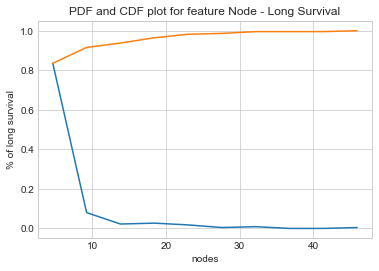

In [175]:

#Storing status in vaiable Long_survive per data point
Long_Survive = cancer_ds.loc[cancer_ds["status"] == 1] 

counts,bin_edges = np.histogram(Long_Survive['nodes'],bins = 10,
                                density= True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);

cdf
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf);
plt.plot(bin_edges[1:], cdf)

plt.xlabel("nodes")
plt.ylabel("% of long survival")
plt.title("PDF and CDF plot for feature Node - Long Survival")
plt.show();

By looking on above plot, we can say that, there is 85% perent of chances of survival if patient nodes > 5. and as number of nodes increases, chances of survival decreases.

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


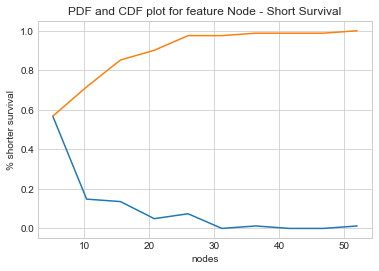

In [176]:
#Plot for status no
#Storing status in vaiable short_survive per data point  

short_Survive = cancer_ds.loc[cancer_ds["status"] == 2]


counts,bin_edges = np.histogram(short_Survive['nodes'],bins = 10,
                                density= True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);

#cdf
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf);
plt.plot(bin_edges[1:], cdf)

plt.xlabel("nodes")
plt.ylabel("% shorter survival")
plt.title("PDF and CDF plot for feature Node - Short Survival")

plt.show();
 

By looking on plot, we can say that, 70% of people are having short survival whose having nodes less than 10.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


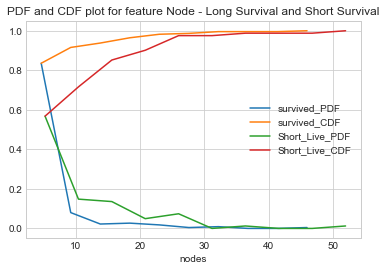

In [177]:

counts,bin_edges = np.histogram(Long_Survive['nodes'],bins = 10,
                                density= True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);

#cdf
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf);
plt.plot(bin_edges[1:], cdf)



counts,bin_edges = np.histogram(short_Survive['nodes'],bins = 10,
                                density= True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);

#cdf
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf);
plt.plot(bin_edges[1:], cdf)

plt.legend(['survived_PDF', 'survived_CDF', 'Short_Live_PDF', 'Short_Live_CDF'])
plt.xlabel("nodes")
plt.title("PDF and CDF plot for feature Node - Long Survival and Short Survival")
plt.show();


we can see both PDF are intersected at point 8(nodes,x-axis). it says that, 40% of higher survival chances for nodes less than 8.

# 1.3 Boxplot

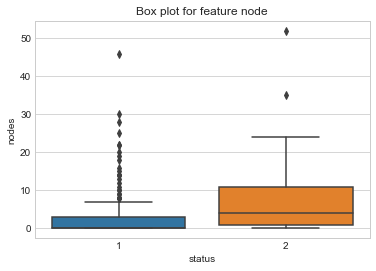

In [178]:
sns.boxplot(x='status',y='nodes', data=cancer_ds)
plt.title("Box plot for feature node")
plt.show()

### Observation:
By using box plots, we can find interquartile range(IQR) like 25th,50th,75th percentile of dataset.
1. 25th and 50th percentile is same for long survive box plot and threshold is 7.
2. 75th percentile of long survival is almost equal to 50th percentile of short survival(Threshold is 25).So there is chance of error for nodes 0-7 as short survival status lies in this range i.e., 50th percentile of short survival

# 1.4 violin plot

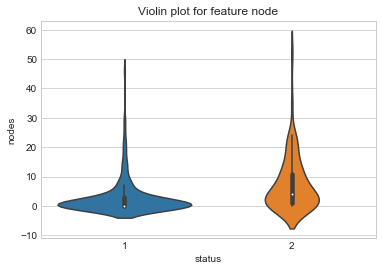

In [180]:
sns.violinplot(x='status',y='nodes', data=cancer_ds)
plt.title("Violin plot for feature node")
plt.show()

### Observation:
The Major difference between the Box plot and Violin plot is, CDF is not nicluded in box plot but included in Violin plot. CDF is nothing but spread of data.
1. violin 1, density of points is more at 0 
2. violin 2, density of points is more in between 0-20

# 2.Bi-variate analysis

# 2.1 Scatter Plots

Total combinations of scatter plots are 3C2 = 3 

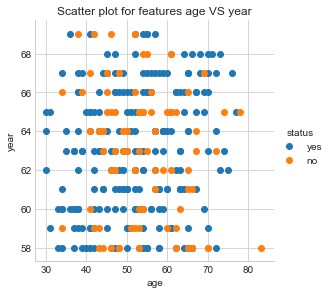

In [218]:
sns.set_style("whitegrid");
sns.FacetGrid(cancer_ds,hue="status",size=4)\
    .map(plt.scatter,"age","year")\
    .add_legend();
plt.title("Scatter plot for features age VS year")
plt.show()

### Observation
Most of the points are overlapped. So we cannot distingush between the high survival and low suvival rate

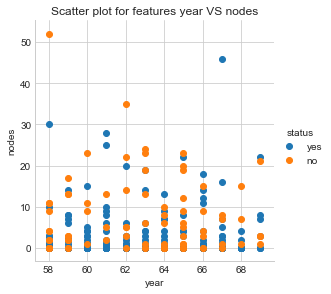

In [224]:
sns.set_style("whitegrid");
sns.FacetGrid(cancer_ds,hue="status",size=4)\
    .map(plt.scatter,"year","nodes")\
    .add_legend()
plt.title("Scatter plot for features year VS nodes")
plt.show();


### Observation :
Again, just like previous scatter plot, it's difficult to find out the survival status rate.

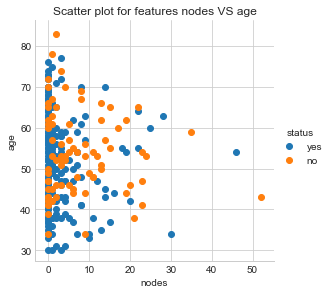

In [227]:
sns.set_style("whitegrid");
sns.FacetGrid(cancer_ds,hue="status",size=4)\
    .map(plt.scatter,"nodes","age")\
    .add_legend()
plt.title("Scatter plot for features nodes VS age")
plt.show();

### Observation :
Unlike the previous scatter plots, this plot can help us to determine the survival probabilty status.  
At any given age, if the number of nodes of a patient is less than 5, then there is high chances to survival,because the density of given points is high nodes less than 5. 

# 2.2 Pair Plots

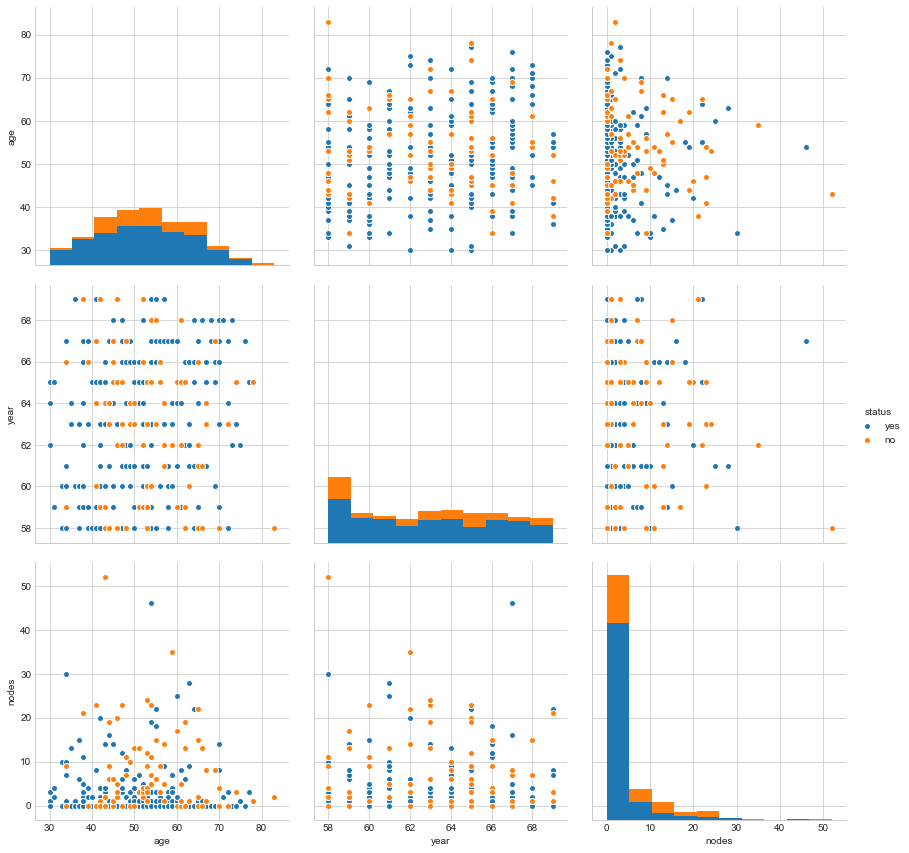

In [223]:
plt.close();
sns.set_style("whitegrid")
cancer_ds['status'] = cancer_ds['status'].map({1:"yes", 2:"no"})
sns.pairplot(cancer_ds,hue="status",size =4);
#print(cancer_ds)

plt.show()

### Observations:
1. From Univariate plot we observerd that feature "node" plays key role in determining the survival  status of patient.It's same with pair plots as well. 
2. Considering pair plot having x-axis "age" , y-axis "nodes" or vice versa plot(in pair plots we will have mirror images on either sides of diagnol), probabilty of survival is high when number of nodes are less than 5 for almost at any age given data set.
3. If number of nodes are increasing then there is less probabilty of suvival.
4. Other plots are not useful to predict since there is much overlapping in survival status.It's easy to predict if we have good seperation between the feature points